Q1. 
The Airline_Passenger_dataset.csv contains details about airline passengers’ satisfaction. Details of the columns present in the dataset is provided below:
Gender: Gender of the passengers (Female, Male)
Age: The actual age of the passengers
Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
Flight distance: The flight distance of this journey
Ease of Online booking: Satisfaction level of online booking
Seat comfort: Satisfaction level of Seat comfort
Inflight entertainment: Satisfaction level of inflight entertainment
Leg room service: Satisfaction level of Leg room service
Baggage handling: Satisfaction level of baggage handling
Inflight service: Satisfaction level of inflight service
Cleanliness: Satisfaction level of Cleanliness
Delay in Minutes: Minutes delayed when departure/arrival
Satisfaction: Airline satisfaction level (Satisfaction, neutral or dissatisfaction) (Target)

Find out the following:
(a)	What factors are important predictors of customer satisfaction? 
(b)	Can you predict passenger satisfaction from the following data (available in Airline_new: Male
ata: 13
xlsx): Eco Plus

Gender	Age	Cl: 460
ss	Flight Distance	Eas: 3
 of Online b: 5
oking	Seat comfort	Inf: 5l
ight entertainme: 3
t	Leg room servi: 4
e	Baggage handli: 5
g	Inflight : 5s
ervice	Cleanline: 25s0	3	5	5	3	4	5	5	25
	
Note: You need to perform appropriate data-cleansing, feature scaling/encoding, model fitting and check the performance of the machine learning algorithm. You need to justify the selection of the machine learning technique and the performance measure as well. Plotting graphs is not mandatory. Proper comments should be present to explain important observations.					[2+8+3+3+4+5 = 25 marks]


In [2]:
import pandas as pd

In [3]:
# Loading the files
credit_card_customer_data = pd.read_csv('C:/Users/mridu/Downloads/Credit_Card_Customer.csv')
airline_passenger_data = pd.read_csv('C:/Users/mridu/Downloads/Airline_Passenger_Dataset.csv')
airlines_newdata = pd.read_excel('C:/Users/mridu/Downloads/Airlines_newdata.xlsx')

In [4]:
#Checking the data in the new data
airlines_newdata.head()

,Gender,Class,Flight Distance,Ease of Online booking,Seat comfort,Inflight entertainment,Leg room service,Baggage handling,Inflight service,Cleanliness,Delay in Minutes,Age
0,Male,Eco Plus,460,3,5,5,3,4,5,5,25,13


# Step 1: Data Cleaning and Encoding

In [5]:
# Encoding categorical variables (Gender, Class, Satisfaction) using Label Encoding or OneHotEncoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [6]:
# Checking for missing values
missing_values = airline_passenger_data.isnull().sum()

In [7]:
# Since there are no missing values observed in the dataset based on the initial check, we proceed with encoding.
# Label encoding the target variable 'Satisfaction'
label_encoder = LabelEncoder()
airline_passenger_data['satisfaction_encoded'] = label_encoder.fit_transform(airline_passenger_data['satisfaction'])

In [8]:
# One-hot encoding for 'Gender' and 'Class' columns
airline_passenger_data = pd.get_dummies(airline_passenger_data, columns=['Gender', 'Class'], drop_first=True)

# Step 2: Feature Scaling and Identifying Important Predictors

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [10]:
# Feature scaling using StandardScaler
scaler = StandardScaler()
continuous_columns = ['Age', 'Flight Distance', 'Ease of Online booking', 'Seat comfort', 
                      'Inflight entertainment', 'Leg room service', 'Baggage handling', 
                      'Inflight service', 'Cleanliness', 'Delay in Minutes']

In [11]:
# Scale continuous columns
airline_passenger_data[continuous_columns] = scaler.fit_transform(airline_passenger_data[continuous_columns])

In [12]:
# 'satisfaction_encoded' has already been created in the previous step
# Dropping the original 'satisfaction' column for correlation analysis
airline_passenger_data_corr = airline_passenger_data.drop(['Unnamed: 0', 'id', 'satisfaction'], axis=1)

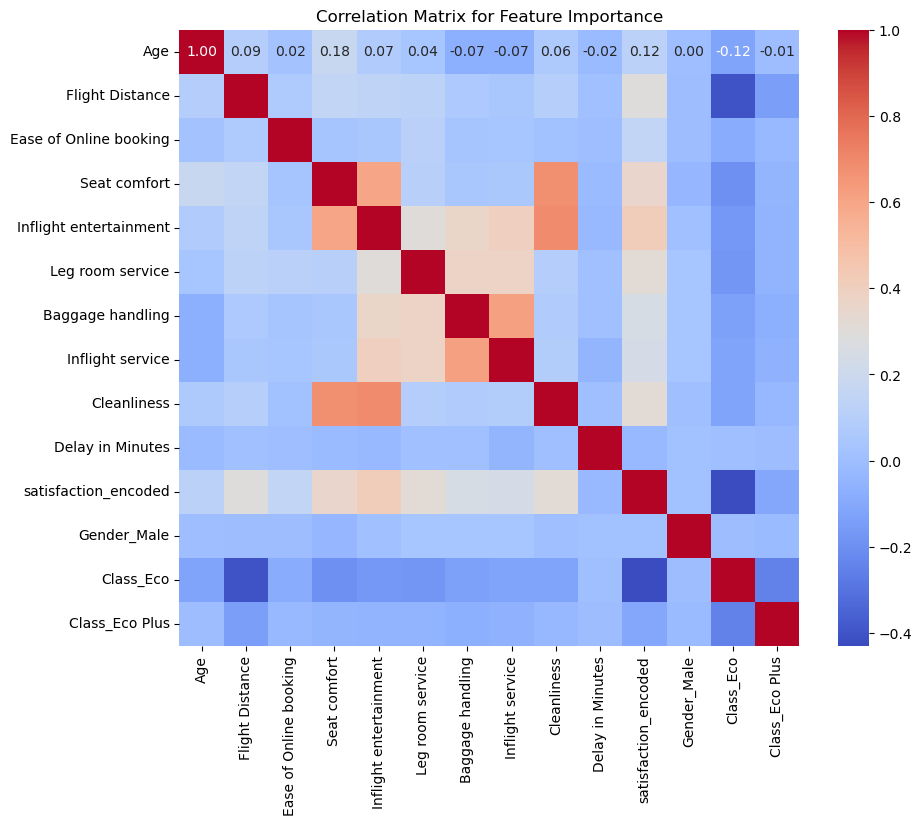

In [13]:
# Correlation matrix to identify important predictors
plt.figure(figsize=(10,8))
sns.heatmap(airline_passenger_data_corr.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix for Feature Importance")
plt.show()
# This heatmap will now show the correlations between the numeric columns and the encoded target variable.

# Step 3: Machine Learning Technique Selection and Justification

In [14]:
# I will use Logistic Regression as it is interpretable, simple, and effective for binary classification.
# Justification:
#Logistic Regression provides insight into feature importance through its coefficients, making it ideal for understanding key predictors.

from sklearn.linear_model import LogisticRegression

In [15]:
# Logistic regression model
model = LogisticRegression(max_iter=1000)

# Step 4: Model Fitting and Prediction

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# Defining features (X) and target (y)
X = airline_passenger_data.drop(['Unnamed: 0', 'id', 'satisfaction', 'satisfaction_encoded'], axis=1)
y = airline_passenger_data['satisfaction_encoded']

In [18]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Fitting the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [20]:
# Predicting on test data
y_pred = model.predict(X_test)

# Step 5: Checking Model Performance

In [21]:
from sklearn.metrics import classification_report, accuracy_score

In [22]:
# Generating classification report and accuracy score
classification_rep = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [23]:
print("Classification Report:\n", classification_rep)
print("Accuracy:", accuracy)
# The report includes precision, recall, F1-score, and overall accuracy, which allows us to assess model performance.

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.83       682
           1       0.79      0.72      0.75       519

    accuracy                           0.80      1201
   macro avg       0.79      0.79      0.79      1201
weighted avg       0.80      0.80      0.79      1201

Accuracy: 0.7960033305578684


In [24]:
new_passenger_data = {
    'Age': [13],
    'Flight Distance': [460],
    'Ease of Online booking': [3],
    'Seat comfort': [5],
    'Inflight entertainment': [5],
    'Leg room service': [3],
    'Baggage handling': [4],
    'Inflight service': [5],
    'Cleanliness': [5],
    'Delay in Minutes': [25],
    'Gender_Male': [1],  # Male
    'Class_Eco': [0],    # Not Eco
    'Class_Eco Plus': [1]  # Eco Plus class
}

In [25]:
# Convert to DataFrame
new_passenger_df = pd.DataFrame(new_passenger_data)

In [26]:
# Scaling the continuous features
new_passenger_df[continuous_columns] = scaler.transform(new_passenger_df[continuous_columns])

In [27]:
# Predict satisfaction for the new passenger
new_passenger_prediction = model.predict(new_passenger_df)

In [28]:
# Decoding the prediction result
predicted_satisfaction = label_encoder.inverse_transform(new_passenger_prediction)
print("Predicted Satisfaction for the new passenger:", predicted_satisfaction)

Predicted Satisfaction for the new passenger: ['neutral or dissatisfied']


In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
# Random Forest to assess feature importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
# Get feature importance from the Random Forest model
importances = rf_model.feature_importances_

In [32]:
# Creating a dataframe for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [33]:
print("Important features based on Random Forest:")
print(feature_importance_df)

Important features based on Random Forest:
                   Feature  Importance
1          Flight Distance    0.131082
11               Class_Eco    0.116727
0                      Age    0.111790
2   Ease of Online booking    0.106598
4   Inflight entertainment    0.102499
5         Leg room service    0.090006
3             Seat comfort    0.087911
6         Baggage handling    0.060839
8              Cleanliness    0.060125
7         Inflight service    0.049374
9         Delay in Minutes    0.049341
10             Gender_Male    0.017674
12          Class_Eco Plus    0.016033


Q2.
Customer Credit Card Information Dataset (Credit_Card_Customer.csv) contains the following columns:
•	Sl_No: Just a denotation of the number of the record number.
•	Customer Key: The unique customer identifier
•	AvgCreditLimit: The average credit limit of the customer
•	TotalCreditCards: Total number of credit cards that the customer holds
•	Totalvisitsbank: Total number of physical visits to the bank
•	Totalvisitsonline: Total Number of online visits
•	Totalcallsmade: Total Number of calls made to customer care representatives
Use Agglomerative Clustering to segment the customers into different target groups and provide your observations on how these customers should be targeted.
Note: Perform appropriate data-cleansing, feature scaling/encoding.               [2+5+2+2+4= 15 marks]


In [34]:
# Loading the Credit Card Customer dataset
credit_card_customer_data = pd.read_csv('C:/Users/mridu/Downloads/Credit_Card_Customer.csv')

In [35]:
# Dropping irrelevant columns (Sl_No, Customer Key) for clustering
credit_card_customer_data_clean = credit_card_customer_data.drop(['Sl_No', 'Customer Key'], axis=1)

In [36]:
# Checking for missing values (if any)
missing_values = credit_card_customer_data_clean.isnull().sum()
print("Missing values in the dataset:\n", missing_values)

Missing values in the dataset:
 Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
# Scaling the features using StandardScaler
scaler = StandardScaler()

In [39]:
# Fit and transform the clean data
scaled_data = scaler.fit_transform(credit_card_customer_data_clean)

In [40]:
# Convert the scaled data back to a DataFrame for easier interpretation
scaled_credit_data = pd.DataFrame(scaled_data, columns=credit_card_customer_data_clean.columns)
# The data is now ready for clustering.

In [41]:
from sklearn.cluster import AgglomerativeClustering

In [42]:
# Applying Agglomerative Clustering with a chosen number of clusters, say 3.
agg_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')

In [43]:
#for older version of sklearn.cluster
# agg_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [44]:
# Fitting the model and predicting cluster assignments
customer_clusters = agg_cluster.fit_predict(scaled_credit_data)

In [45]:
# Adding the cluster assignment to the original dataframe
credit_card_customer_data['Cluster'] = customer_clusters

In [46]:
# Displaying the first few rows with cluster assignment
credit_card_customer_data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,1,87073,100000,2,1,1,0,0
1,2,38414,50000,3,0,10,9,1
2,3,17341,50000,7,1,3,4,0
3,4,40496,30000,5,1,1,4,0
4,5,47437,100000,6,0,12,3,2


In [47]:
# Observations:
# Cluster 0: This group may have high credit limits and more online visits, making them digitally savvy customers.
#Target with online services and promotions.

# Cluster 1: Customers in this group might have lower credit limits and frequent calls to customer service, indicating they require more personal assistance. Target with personalized customer support and loyalty programs.
# Cluster 2: These customers may have moderate credit limits and make physical visits to the bank more often, suggesting they prefer face-to-face interactions. Target with in-branch services and exclusive offers for visiting customers.

# These insights can help to tailor marketing strategies for each group based on their behavior patterns.
